In [ ]:
# # ### Shell
for dir in $(ls | sort -V); do
    if [ -f "$dir/dpdo280k-ratio.xvg" ]; then
        grep -v '^#' "$dir/dpdo280k-ratio.xvg" >> dpdo280k-ratio_10us_raw.xvg
    fi
done

for dir in $(ls | sort -V); do
    if [ -f "$dir/dpdo280k-rawdata.xvg" ]; then
        grep -v '^#' "$dir/dpdo280k-rawdata.xvg" >> dpdo280k-rawdata_10us_raw.xvg
    fi
done

for dir in $(ls | sort -V); do
    if [ -f "$dir/dpdo290k-ratio.xvg" ]; then
        grep -v '^#' "$dir/dpdo290k-ratio.xvg" >> dpdo290k-ratio_10us_raw.xvg
    fi
done

for dir in $(ls | sort -V); do
    if [ -f "$dir/dpdo290k-rawdata.xvg" ]; then
        grep -v '^#' "$dir/dpdo290k-rawdata.xvg" >> dpdo290k-rawdata_10us_raw.xvg
    fi
done

# # ### Shell
# for dir in $(ls | sort -V); do
#     if [ -f "$dir/dpdochl280k-ratio.xvg" ]; then
#         grep -v '^#' "$dir/dpdochl280k-ratio.xvg" >> dpdochl280k-ratio_8us_raw.xvg
#     fi
# done

# for dir in $(ls | sort -V); do
#     if [ -f "$dir/dpdochl280k-rawdata.xvg" ]; then
#         grep -v '^#' "$dir/dpdochl280k-rawdata.xvg" >> dpdochl280k-rawdata_8us_raw.xvg
#     fi
# done

# # # awk 'BEGIN {for (i = 0; i <= 10000; i += 5) new_col[i/5] = i} /^#|^@/ {print $0; next} {printf "%d ", new_col[NR-1]; for (j = 2; j <= NF; j++) printf "%s%s", $j, (j < NF ? OFS : ORS)}' dpdo280k-rawdata_10us_raw.xvg > dpdo280k-rawdata_10us.xvg

for dir in $(ls | sort -V); do
    if [ -f "$dir/dpdochl290k-ratio.xvg" ]; then
        grep -v '^#' "$dir/dpdochl290k-ratio.xvg" >> dpdochl290k-ratio_9us_raw.xvg
    fi
done

for dir in $(ls | sort -V); do
    if [ -f "$dir/dpdochl290k-rawdata.xvg" ]; then
        grep -v '^#' "$dir/dpdochl290k-rawdata.xvg" >> dpdochl290k-rawdata_9us_raw.xvg
    fi
done

for dir in $(ls | sort -V); do
    if [ -f "$dir/psmdopochl-ratio.xvg" ]; then
        grep -v '^#' "$dir/psmdopochl-ratio.xvg" >> psmdopochl-ratio_20us_raw.xvg
    fi
done

for dir in $(ls | sort -V); do
    if [ -f "$dir/psmdopochl-rawdata.xvg" ]; then
        grep -v '^#' "$dir/psmdopochl-rawdata.xvg" >> psmdopochl-rawdata_20us_raw.xvg
    fi
done

# 脂质个数比例

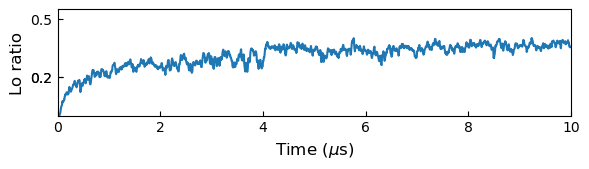

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 读取数据文件
def read_xvg(file_path):
    """
    读取 .xvg 文件，第一列是时间标签，剩余列是脂质的相态标签（0或1）
    """
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            # 跳过注释行
            if line.startswith('#') or line.startswith('@'):
                continue
            data.append(list(map(float, line.split())))  # 解析数据行
    return np.array(data)
# 计算标签 1 的占比
def calculate_ratio(data):
    """
    输入数据数组，计算每个时间点标签 1 的占比
    """
    time = data[:, 0]/1000  # 第一列为时间
    lipid_states = data[:, 1:577]  # upper
    # lipid_states = data[:, 577:1153]  # lower
    ratio = np.mean(lipid_states, axis=1)  # 标签 1 的占比 (列均值)
    return time, ratio
# 绘图
def plot_ratio(time, ratio):
    """
    绘制时间 vs 标签 1 的占比
    """
    plt.figure(figsize=(6, 1.8))
    plt.plot(time, ratio, label='Proportion of Label 1') #, color='blue'
    plt.xlim(0, 10)
    plt.ylim(0, 0.55)
    plt.xticks(range(0, 11, 2))
    plt.yticks([0.2, 0.5, 0.2])
    plt.xlabel(r'Time ($\mu$s)', fontsize=12)
    plt.ylabel('Lo ratio', fontsize=12)
    plt.title('', fontsize=14)
    # plt.legend(fontsize=10)
    
    plt.tick_params(direction='in')
    plt.tight_layout()
    plt.show()

# 主程序
file_path = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdo280k/dpdo280k-rawdata_10us_raw.xvg'  # 文件路径
# file_path = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdochl280k/dpdochl280k-rawdata_8us_raw.xvg'  # 文件路径
data = read_xvg(file_path)  # 读取数据
time, ratio = calculate_ratio(data)  # 计算标签 1 的占比
plot_ratio(time, ratio)  # 绘图


# 所占面积之比

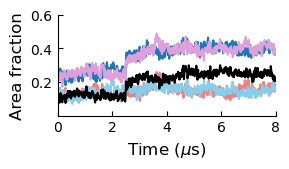

In [54]:
import matplotlib.pyplot as plt
import numpy as np
def read_data(file_path):
    """
    读取数据文件，跳过注释行并返回数据数组。
    """
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.strip() and not line.startswith(('#', '@')):  # 跳过注释行
                data.append(list(map(float, line.split())))
    return np.array(data)
def process_data(data):
    """
    处理数据，将时间列和占比列分开，并计算 registration 占比。
    """
    time = data[:, 0]
    u_Lo_ratio = data[:, 1]
    l_Lo_ratio = data[:, 2]
    u_Lo_l_Lo_ratio = data[:, 3]
    u_Ld_l_Ld_ratio = data[:, 4]
    u_Lo_l_Ld_ratio = data[:, 5]
    u_Ld_l_Lo_ratio = data[:, 6]

    # time = data[200:, 0]
    # u_Lo_ratio = data[200:, 1]
    # l_Lo_ratio = data[200:, 2]
    # u_Lo_l_Lo_ratio = data[200:, 3]
    # u_Ld_l_Ld_ratio = data[200:, 4]
    # u_Lo_l_Ld_ratio = data[200:, 5]
    # u_Ld_l_Lo_ratio = data[200:, 6]
 
    return time, u_Lo_ratio, l_Lo_ratio, u_Lo_l_Lo_ratio, u_Ld_l_Ld_ratio, u_Lo_l_Ld_ratio, u_Ld_l_Lo_ratio

def plot_data(sys, time, u_Lo_ratio, l_Lo_ratio, u_Lo_l_Ld_ratio, u_Ld_l_Lo_ratio, registration_ratio):
    """
    绘制折线图。
    """
    fig,ax = plt.subplots(figsize=(3, 1.8))
    # fig,ax = plt.subplots(figsize=(6, 1.8))  #psm

    time = time/1000    

    # 指定颜色
    colors = {
        'u_Lo': '#1f77b4',          # 蓝色
        'l_Lo': '#DDA0DD',        # 紫色
        'u_Ld_l_Lo': 'lightcoral',  # 浅红色
        'u_Lo_l_Ld': 'skyblue',  # 浅蓝色
        'registration': 'black'  # 黑色
    }

    # 绘制折线
    plt.plot(time, u_Lo_ratio, label='u, Lo', color=colors['u_Lo'])
    plt.plot(time, l_Lo_ratio, label='l, Lo', color=colors['l_Lo'])
    plt.plot(time, u_Ld_l_Lo_ratio, label='u, Ld; l, Lo', color=colors['u_Ld_l_Lo'])
    plt.plot(time, u_Lo_l_Ld_ratio, label='u, Lo; l, Ld', color=colors['u_Lo_l_Ld'])
    plt.plot(time, registration_ratio, label='Registration', color=colors['registration'])


    plt.ylim(0, 0.6)
    plt.yticks(np.arange(0.2, 0.61, 0.2))
    
    # plt.xlim(0, 10)              # dpdo
    # plt.xticks(range(0, 11, 2))

    plt.xlim(0, 8)               # dpdochl280k
    plt.xticks(np.arange(0, 9, 2))

    # plt.xlim(0, 9)               # dpdochl290k
    # plt.xticks(np.arange(0, 10, 2))

    # plt.xlim(0, 20)              # psm
    # plt.xticks(range(0, 21, 4))

    
    # 图表美化
    plt.xlabel(r'Time ($\mu$s)', fontsize=12)
    plt.ylabel('Area fraction', fontsize=12)
    plt.title('', fontsize=14)
    # plt.text(0, 1.1, sys, 
    #         fontsize=12, fontweight='bold', ha='left', transform=plt.gca().transAxes)
# 添加图例，放置在图形下方
    # plt.legend(
    #     fontsize=8, 
    #     loc='upper left', 
    #     bbox_to_anchor=(0,1.1),  # 控制图例在图形下方的位置
    #     ncol=5, 
    #     frameon=False,
    #     labelspacing=0.05,      # 控制图例项之间的垂直间距
    #     columnspacing=0.5,      # 控制图例项之间的横向间距
    #     handlelength=0.5,      # 控制图例标记的长度
    #     handletextpad=0.2      # 控制图例标记和文字之间的水平间距
    # )
    # 取消上边框和右边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tick_params(direction='in')
    plt.tight_layout()
    # 显示图表
    # plt.show()
    plt.savefig(
        '/data/gulab/yzdai/data4/phase_identification/plot/output/full_time/'+sys+'-time2AreaF.png',        # 文件名
        dpi=350,             # 分辨率
        format='png',        # 文件格式
        bbox_inches='tight', # 自动调整边界框
        pad_inches=0.0,      # 边界填充
        # facecolor='white',   # 背景颜色
        # edgecolor='black',   # 边缘颜色
        transparent=True,   # 是否透明背景
        # metadata={'Author': 'Your Name'}  # 元数据
    )


# sys = 'dpdo280k'
# file_path = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdo280k/dpdo280k-ratio_10us_raw.xvg'
# sys = 'dpdo290k'
# file_path = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdo290k/dpdo290k-ratio_10us_raw.xvg'

sys = 'dpdochl280k'
file_path = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdochl280k/dpdochl280k-ratio_8us_raw.xvg'
# sys = 'dpdochl290k'
# file_path = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdochl290k/dpdochl290k-ratio_9us_raw.xvg'

# sys = 'psmdopochl'
# file_path = '/data/gulab/yzdai/data4/phase_identification/phase_out/psmdopochl/psmdopochl-ratio_20us_raw.xvg'


data = read_data(file_path)
time, u_Lo_ratio, l_Lo_ratio, u_Lo_l_Lo_ratio, u_Ld_l_Ld_ratio, u_Lo_l_Ld_ratio, u_Ld_l_Lo_ratio = process_data(data)
# 绘制图表
plot_data(sys, time, u_Lo_ratio, l_Lo_ratio, u_Lo_l_Ld_ratio, u_Ld_l_Lo_ratio, u_Lo_l_Lo_ratio)



局部放大

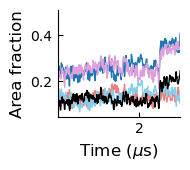

In [55]:
import matplotlib.pyplot as plt
import numpy as np
def read_data(file_path):
    """
    读取数据文件，跳过注释行并返回数据数组。
    """
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.strip() and not line.startswith(('#', '@')):  # 跳过注释行
                data.append(list(map(float, line.split())))
    return np.array(data)
def process_data(data):
    """
    处理数据，将时间列和占比列分开，并计算 registration 占比。
    """
    time = data[:, 0]
    u_Lo_ratio = data[:, 1]
    l_Lo_ratio = data[:, 2]
    u_Lo_l_Lo_ratio = data[:, 3]
    u_Ld_l_Ld_ratio = data[:, 4]
    u_Lo_l_Ld_ratio = data[:, 5]
    u_Ld_l_Lo_ratio = data[:, 6]
 
    return time, u_Lo_ratio, l_Lo_ratio, u_Lo_l_Lo_ratio, u_Ld_l_Ld_ratio, u_Lo_l_Ld_ratio, u_Ld_l_Lo_ratio

def plot_data(sys, time, u_Lo_ratio, l_Lo_ratio, u_Lo_l_Ld_ratio, u_Ld_l_Lo_ratio, registration_ratio):
    """
    绘制折线图。
    """
    fig,ax = plt.subplots(figsize=(2, 1.8))

    time = time/1000     #others

    # 指定颜色
    colors = {
        'u_Lo': '#1f77b4',          # 蓝色
        'l_Lo': '#DDA0DD',        # 紫色
        'u_Ld_l_Lo': 'lightcoral',  # 浅红色
        'u_Lo_l_Ld': 'skyblue',  # 浅蓝色
        'registration': 'black'  # 黑色
    }

    # 绘制折线
    plt.plot(time, u_Lo_ratio, label='u, Lo', color=colors['u_Lo'], linewidth = 1)
    plt.plot(time, l_Lo_ratio, label='l, Lo', color=colors['l_Lo'], linewidth = 1)
    plt.plot(time, u_Ld_l_Lo_ratio, label='u, Ld; l, Lo', color=colors['u_Ld_l_Lo'], linewidth = 1)
    plt.plot(time, u_Lo_l_Ld_ratio, label='u, Lo; l, Ld', color=colors['u_Lo_l_Ld'], linewidth = 1)
    plt.plot(time, registration_ratio, label='Registration', color=colors['registration'], linewidth = 1)


    # plt.ylim(0, 0.3)        # dpdo
    # plt.yticks(np.arange(0.2, 0.31, 0.2))

    # plt.ylim(0, 0.4)         # dpdo280k
    # plt.yticks(np.arange(0.2, 0.41, 0.2))
    
    # plt.xlim(0, 2)              # dpdo
    # plt.xticks(range(1, 3, 1))

    plt.xlim(0, 3)               # dpdochl2280k
    plt.xticks(np.arange(2, 4, 2))
    # plt.xlim(0, 20)              # psm
    # plt.xticks(range(0, 21, 4))
    # 图表美化
    plt.xlabel(r'Time ($\mu$s)', fontsize=12)
    plt.ylabel('Area fraction', fontsize=12)
    plt.title('', fontsize=14)
    # plt.text(0, 1.1, sys, 
    #         fontsize=12, fontweight='bold', ha='left', transform=plt.gca().transAxes)
# 添加图例，放置在图形下方
    # plt.legend(
    #     fontsize=8, 
    #     loc='upper left', 
    #     bbox_to_anchor=(0,1.1),  # 控制图例在图形下方的位置
    #     ncol=5, 
    #     frameon=False,
    #     labelspacing=0.05,      # 控制图例项之间的垂直间距
    #     columnspacing=0.5,      # 控制图例项之间的横向间距
    #     handlelength=0.5,      # 控制图例标记的长度
    #     handletextpad=0.2      # 控制图例标记和文字之间的水平间距
    # )
    # 取消上边框和右边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tick_params(direction='in')
    plt.tight_layout()
    # 显示图表
    # plt.show()
    plt.savefig(
        '/data/gulab/yzdai/data4/phase_identification/plot/output/full_time/'+sys+'-time2AreaF_local.png',        # 文件名
        dpi=350,             # 分辨率
        format='png',        # 文件格式
        bbox_inches='tight', # 自动调整边界框
        pad_inches=0.0,      # 边界填充
        # facecolor='white',   # 背景颜色
        # edgecolor='black',   # 边缘颜色
        transparent=True,   # 是否透明背景
        # metadata={'Author': 'Your Name'}  # 元数据
    )
# sys = 'dpdo280k'
# file_path = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdo280k/dpdo280k-ratio_10us_raw.xvg'
# sys = 'dpdo290k'
# file_path = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdo290k/dpdo290k-ratio_10us_raw.xvg'

sys = 'dpdochl280k'
file_path = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdochl280k/dpdochl280k-ratio_8us_raw.xvg'

# sys = 'dpdochl290k'
# file_path = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdochl290k/dpdochl290k-ratio_9us_raw.xvg'

# sys = 'psmdopochl'
# file_path = '/data/gulab/yzdai/data4/phase_identification/phase_out/psmdopochl/psmdopochl-ratio_20us_raw.xvg'


# # 读取并处理数据
# data = read_data(file_path1)
# time, u_Lo_ratio, l_Lo_ratio, u_Lo_l_Lo_ratio, u_Ld_l_Ld_ratio, u_Lo_l_Ld_ratio, u_Ld_l_Lo_ratio = process_data(data)
# # 绘制图表
# plot_data(time, u_Lo_ratio, l_Lo_ratio, u_Ld_l_Lo_ratio, u_Lo_l_Ld_ratio, u_Ld_l_Ld_ratio)


data = read_data(file_path)
time, u_Lo_ratio, sl_Lo_ratio, u_Lo_l_Lo_ratio, u_Ld_l_Ld_ratio, u_Lo_l_Ld_ratio, u_Ld_l_Lo_ratio = process_data(data)
# 绘制图表
plot_data(sys, time, u_Lo_ratio, l_Lo_ratio, u_Lo_l_Ld_ratio, u_Ld_l_Lo_ratio, u_Lo_l_Lo_ratio)



# Scd随时间的函数

In [35]:
# sys = 'dpdo280k'
# phase_file = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdo280k/dpdo280k-rawdata_10us_raw.xvg'
# phase = np.loadtxt(phase_file)[:,1:]
# scd_file = '/data/gulab/yzdai/data4/phase_identification/plot/input/full_time_scd/dpdo280k_scd_10us_gap5.xvg'
# scd = np.loadtxt(scd_file)[:,:]
# time = np.loadtxt(phase_file)[:,0]/1000

# sys= 'dpdochl280k'
# phase_file = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdochl280k/dpdochl280k-rawdata_8us_raw.xvg'
# phase = np.loadtxt(phase_file)[:,1:]
# scd_file = '/data/gulab/yzdai/data4/atomdensity/plot_data/full_time_scd/dpdochl280k_scd_8us_gap5.xvg'
# scd = np.loadtxt(scd_file)[:,:]
# time = np.loadtxt(phase_file)[:,0]/1000

sys= 'dpdochl290k'
phase_file = '/data/gulab/yzdai/data4/phase_identification/phase_out/dpdochl290k/dpdochl290k-rawdata_9us_raw.xvg'
phase = np.loadtxt(phase_file)[:,1:]
print(phase.shape)
scd_file = '/data/gulab/yzdai/data4/atomdensity/plot_data/full_time_scd/dpdochl290k_scd_9us_gap5.xvg'
scd = np.loadtxt(scd_file)[:,:]
time = np.loadtxt(phase_file)[:,0]/1000

(1800, 1152)


[0.2968488250652741, 0.29276170212765956, 0.2833467032967033, 0.2819869918699187, 0.2895957671957672, 0.2847987113402062, 0.29076167512690354, 0.2850844736842105, 0.28285973684210525, 0.2827576315789474]
[0.1813747191011236, 0.2539893258426966, 0.2594174157303371, 0.2690771144278607, 0.27676271929824564, 0.26729102040816327, 0.2808980842911878, 0.279119776119403, 0.2779923076923077, 0.27146591760299627]


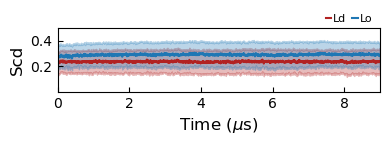

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 选择类别 0 和 类别 1 的 scd
scd_class0 = []; 
scd_class1 = []
time_n0 = []
time_n1 = []
for n_fr in range(len(scd)):
    scd_class0_n_fr = []
    scd_class1_n_fr = []
    time_n_fr0 = []
    time_n_fr1= []
    for n_lip in range(len(scd[0])):
        if phase[n_fr][n_lip] == 0:
            scd_class0_n_fr.append(scd[n_fr][n_lip])
            time_n_fr0.append(time[n_fr])
        else:
            scd_class1_n_fr.append(scd[n_fr][n_lip])
            time_n_fr1.append(time[n_fr])
    scd_class0.append(scd_class0_n_fr)
    scd_class1.append(scd_class1_n_fr)
    time_n0.append(time_n_fr0)
    time_n1.append(time_n_fr1)
# scd_class0 = [item for sublist in scd_class0 for item in sublist]
# scd_class1 = [item for sublist in scd_class1 for item in sublist]
# time_n0 = [item for sublist in time_n0 for item in sublist]
# time_n1 = [item for sublist in time_n1 for item in sublist]

# 计算均值和标准差
mean_class0 = [np.mean(scd_class0_n_fr) if len(scd_class0_n_fr) > 0 else 0 \
               for scd_class0_n_fr in scd_class0]
std_class0 = [np.std(scd_class0_n_fr) if len(scd_class0_n_fr) > 0 else 0 \
              for scd_class0_n_fr in scd_class0]

mean_class1 = [np.mean(scd_class1_n_fr) if len(scd_class1_n_fr) > 0 else 0 \
               for scd_class1_n_fr in scd_class1]
std_class1 = [np.std(scd_class1_n_fr) if len(scd_class1_n_fr) > 0 else 0 \
              for scd_class1_n_fr in scd_class1]
print(mean_class1[-10:])
print(mean_class1[:10])

fig, ax = plt.subplots(figsize=(4, 1.5))

# 绘制 Class 0 的均值折线和阴影区域
ax.plot(time, mean_class0, label="Ld", color="#B22222")
ax.fill_between(time, np.array(mean_class0) - np.array(std_class0), np.array(mean_class0) + np.array(std_class0), \
                color="#B22222", alpha=0.3)

# 绘制 Class 1 的均值折线和阴影区域
ax.plot(time, mean_class1, label="Lo", color='#1f77b4')
ax.fill_between(time, np.array(mean_class1) - np.array(std_class1), np.array(mean_class1) + np.array(std_class1), \
                color="#1f77b4", alpha=0.3)

plt.xlabel(r'Time ($\mu$s)', fontsize=12)
plt.ylabel('Scd', fontsize=12)
plt.title('', fontsize=14)
# plt.text(0, 1.1, sys, 
#         fontsize=12, fontweight='bold', ha='left', transform=plt.gca().transAxes)
# 添加图例，放置在图形下方
plt.legend(
    fontsize=8, 
    loc='lower left', 
    bbox_to_anchor=(0.8,0.9),  # 控制图例在图形下方的位置
    ncol=5, 
    frameon=False,
    labelspacing=0.05,      # 控制图例项之间的垂直间距
    columnspacing=0.5,      # 控制图例项之间的横向间距
    handlelength=0.5,      # 控制图例标记的长度
    handletextpad=0.2      # 控制图例标记和文字之间的水平间距
)
plt.ylim(0, 0.5)
plt.yticks(np.arange(0.2, 0.51, 0.2))

# plt.xlim(0, 10)              # dpdo
# plt.xticks(range(0, 11, 2))

# plt.xlim(0, 8)              # dpdochl280k
# plt.xticks(range(0, 9, 2))

plt.xlim(0, 9)              # dpdochl290k
plt.xticks(range(0, 9, 2))

plt.tick_params(direction='in')
plt.tight_layout()
# 显示图表
# plt.show()
# plt.savefig('/data/gulab/yzdai/data4/atomdensity/plot_data/out/'+sys+'-timie2scd.png',\
#             dpi=350)
# 保存图像，指定参数
plt.savefig(
    '/data/gulab/yzdai/data4/phase_identification/plot/output/full_time/'+sys+'-time2scd.png',        # 文件名
    dpi=350,             # 分辨率
    format='png',        # 文件格式
    bbox_inches='tight', # 自动调整边界框
    pad_inches=0.0,      # 边界填充
    # facecolor='white',   # 背景颜色
    # edgecolor='black',   # 边缘颜色
    transparent=True,   # 是否透明背景
    # metadata={'Author': 'Your Name'}  # 元数据
)

9
9


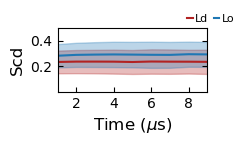

In [37]:
# 创建存储所有数据的大列表
scd_class0_us = []
scd_class1_us = []
time_us = []
# 每200个fr为1us
fr_per_us = 200
# 计算总共有多少个1us数据（每200个fr为1us，且总共有2000个fr）
num_us = len(scd) // fr_per_us
print(num_us)
# 循环每一个1us的数据
for i in range(num_us):
    # 每200个fr作为一个时间段
    start_idx = i * fr_per_us
    end_idx = (i + 1) * fr_per_us
    # 对于每个时间段，提取出对应的数据
    scd_class0_us_n = []
    scd_class1_us_n = []
    for n_fr in range(start_idx, end_idx):
        scd_class0_n_fr = []
        scd_class1_n_fr = []
        # 根据类别进行分类
        for n_lip in range(len(scd[0])):
            if phase[n_fr][n_lip] == 0:
                scd_class0_n_fr.append(scd[n_fr][n_lip])
            else:
                scd_class1_n_fr.append(scd[n_fr][n_lip])
        scd_class0_us_n.extend(scd_class0_n_fr)
        scd_class1_us_n.extend(scd_class1_n_fr)
    # 将每个时间段的数据添加到大列表中
    scd_class0_us.append(scd_class0_us_n)
    scd_class1_us.append(scd_class1_us_n)
    time_us.append(time[start_idx]+1)

# 计算均值和标准差
mean_class0 = [np.mean(scd_class0_n_fr) if len(scd_class0_n_fr) > 0 else 0 \
               for scd_class0_n_fr in scd_class0_us]
print(len(mean_class0))
std_class0 = [np.std(scd_class0_n_fr) if len(scd_class0_n_fr) > 0 else 0 \
              for scd_class0_n_fr in scd_class0_us]

mean_class1 = [np.mean(scd_class1_n_fr) if len(scd_class1_n_fr) > 0 else 0 \
               for scd_class1_n_fr in scd_class1_us]
std_class1 = [np.std(scd_class1_n_fr) if len(scd_class1_n_fr) > 0 else 0 \
              for scd_class1_n_fr in scd_class1_us]

fig, ax = plt.subplots(figsize=(2.5, 1.5))

# 绘制 Class 0 的均值折线和阴影区域
ax.plot(time_us, mean_class0, label="Ld", color="#B22222")
ax.fill_between(time_us, np.array(mean_class0) - np.array(std_class0), np.array(mean_class0) + np.array(std_class0), \
                color="#B22222", alpha=0.3)

# 绘制 Class 1 的均值折线和阴影区域
ax.plot(time_us, mean_class1, label="Lo", color='#1f77b4')
# ax.plot(time_us, [0.4 for x in range(10)], color='grey')
# ax.plot(time_us, [0.2 for x in range(10)], color='grey')
ax.fill_between(time_us, np.array(mean_class1) - np.array(std_class1), np.array(mean_class1) + np.array(std_class1), \
                color="#1f77b4", alpha=0.3)

plt.xlabel(r'Time ($\mu$s)', fontsize=12)
plt.ylabel('Scd', fontsize=12)
plt.title('', fontsize=14)
# plt.text(0, 1.1, sys, 
#         fontsize=12, fontweight='bold', ha='left', transform=plt.gca().transAxes)
# 添加图例，放置在图形下方
plt.legend(
    fontsize=8, 
    loc='lower left', 
    bbox_to_anchor=(0.8,0.9),  # 控制图例在图形下方的位置
    ncol=5, 
    frameon=False,
    labelspacing=0.05,      # 控制图例项之间的垂直间距
    columnspacing=0.5,      # 控制图例项之间的横向间距
    handlelength=0.5,      # 控制图例标记的长度
    handletextpad=0.2      # 控制图例标记和文字之间的水平间距
)
plt.ylim(0, 0.5)
plt.yticks(np.arange(0.2, 0.51, 0.2))

# plt.xlim(1, 10)              # dpdo
# plt.xticks(range(2, 11, 2))

# plt.xlim(1, 8)              # dpdochl280k
# plt.xticks(range(2, 9, 2))

plt.xlim(1, 9)              # dpdochl280k
plt.xticks(range(2, 9, 2))

# 设置右侧的刻度线
ax.tick_params(axis='y', which='both', right=True, labelright=False)

plt.tick_params(direction='in')
plt.tight_layout()
# 显示图表
# plt.show()
# plt.savefig('/data/gulab/yzdai/data4/atomdensity/plot_data/out/'+sys+'-timie2scd.png',\
#             dpi=350)
# # 保存图像，指定参数
# plt.savefig(
#     '/data/gulab/yzdai/data4/atomdensity/plot_data/out/'+sys+'-time2scd.png',        # 文件名
#     dpi=350,             # 分辨率
#     format='png',        # 文件格式
#     bbox_inches='tight', # 自动调整边界框
#     pad_inches=0.0,      # 边界填充
#     # facecolor='white',   # 背景颜色
#     # edgecolor='black',   # 边缘颜色
#     transparent=True,   # 是否透明背景
#     # metadata={'Author': 'Your Name'}  # 元数据
# )


/data/gulab/yzdai/anaconda3/envs/density/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice.
  
/data/gulab/yzdai/anaconda3/envs/density/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


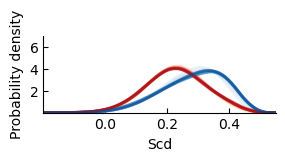

In [38]:
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
def smooth(x: object, y: object, interval: object) -> object:
    xx = []
    yy = []
    for i in range(0, len(x)):
        xx.append(np.array(x[i:i+interval]).mean())
        yy.append(np.array(y[i:i+interval]).mean())

    return xx, yy
# 创建一个新的图形
fig, ax = plt.subplots(figsize=(3, 1))  # 调整图形大小，确保颜色条清晰

# 生成10种红色和蓝色
color_red = plt.cm.Reds(np.linspace(0.2, 1, 10))  # 从红色渐变中选择10种颜色
color_blue = plt.cm.Blues(np.linspace(0.2, 1, 10))  # 从蓝色渐变中选择10种颜色

# 计算每个时间段的直方图并画出柔和的曲线
for i, (scd_class0_n, scd_class1_n) in enumerate(zip(scd_class0_us, scd_class1_us)):
    # 计算直方图数据
    hist0, bins0 = np.histogram(scd_class0_n, bins = 200, range = (-1.0, 1.0), density = True)
    hist1, bins1 = np.histogram(scd_class1_n, bins = 200, range = (-1.0, 1.0), density = True)
    x0,y0=smooth(bins0,hist0,10)
    x1,y1=smooth(bins1,hist1,10)

    # # # Plot filled distributions
    # plt.fill_between(x0, y0, color=color_red[i], alpha=0.5)
    # plt.fill_between(x1, y1, color=color_blue[i], alpha=0.5)


    plt.plot(x0, y0, color=color_red[i], linestyle='-',  linewidth=2, alpha = 0.5)
    plt.plot(x1, y1, color=color_blue[i], linestyle='-',  linewidth=2, alpha = 0.5)

    # # 创建平滑曲线
    # bin_centers0 = (bins0[:-1] + bins0[1:]) / 2
    # bin_centers1 = (bins1[:-1] + bins1[1:]) / 2
    
    # # 使用透明填充的方式
    # plt.fill_between(bin_centers0, hist0, alpha=0.3, color='red')  # scd_class0的透明填充
    # plt.fill_between(bin_centers1, hist1, alpha=0.3, color='blue')  # scd_class1的透明填充

    plt.ylim(0, 7)
    plt.yticks(np.arange(2, 7, 2))

    plt.xlim(-0.2, 0.55)              # dpdo
    plt.xticks(np.arange(0, 0.5, 0.2))
# 设置图表的标题和标签
# plt.title('Distribution of SCD Data for Each 1us')
plt.xlabel('Scd')
plt.ylabel('Probability density')
# # 创建自定义的颜色映射
# cmap_red = ListedColormap(color_red)  # 为红色系创建颜色映射
# cmap_blue = ListedColormap(color_blue)  # 为蓝色系创建颜色映射
# # 绘制颜色条
# # 绘制红色系的颜色条
# cbar_red = plt.colorbar(plt.imshow([[0, 1]], cmap=cmap_red), ax=ax, orientation='horizontal', aspect=25, pad=0.3)
# # cbar_red.set_label("Ld Time Moments")  # 设置标签
# cbar_red.set_ticks([0.2, 0.4, 0.6, 0.8])  # 设置刻度
# cbar_red.set_ticklabels(["2", "4", "6", "8"])  # 自定义刻度标签位置

# # 绘制蓝色系的颜色条
# cbar_blue = plt.colorbar(plt.imshow([[0, 1]], cmap=cmap_blue), ax=ax, orientation='horizontal', aspect=25, pad=0.3)
# # cbar_blue.set_label("Lo Time Moments")  # 设置标签
# # cbar_blue.set_ticks([0.2, 0.4, 0.6, 0.8])  # 设置刻度
# # cbar_blue.set_ticklabels(["2", "4", "6", "8"])  # 自定义刻度标签位置
# cbar_blue.set_ticks([])  # 取消蓝色颜色条的刻度
plt.tick_params(direction = 'in')
# 取消上边框和右边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# # 保存图像，指定参数
# plt.savefig(
#     '/data/gulab/yzdai/data4/atomdensity/plot_data/out/'+sys+'-time2scd_distr.png',        # 文件名
#     dpi=350,             # 分辨率
#     format='png',        # 文件格式
#     bbox_inches='tight', # 自动调整边界框
#     pad_inches=0.0,      # 边界填充
#     # facecolor='white',   # 背景颜色
#     # edgecolor='black',   # 边缘颜色
#     transparent=True,   # 是否透明背景
#     # metadata={'Author': 'Your Name'}  # 元数据
# )


<Figure size 160x200 with 0 Axes>

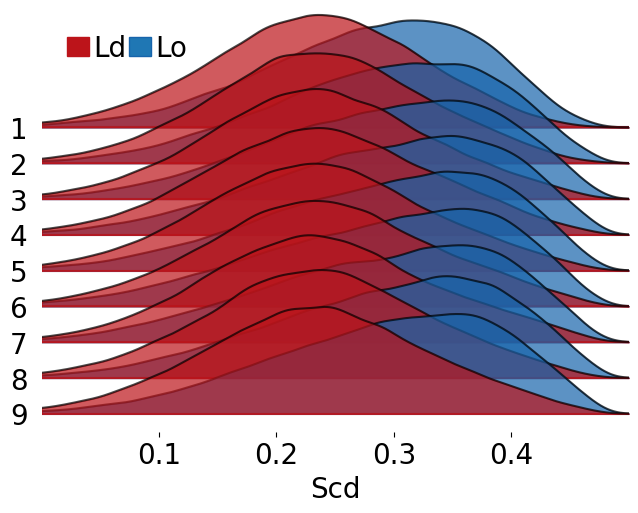

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joypy import joyplot
import matplotlib.patches as mpatches
# 创建空的 DataFrame
df = pd.DataFrame(columns=["Time", "Lo", "Ld"])

# 展开数据并填入 DataFrame
data = []
for i, (scd_class0_n, scd_class1_n) in enumerate(zip(scd_class0_us, scd_class1_us)):
    for value_lo, value_ld in zip(scd_class1_n, scd_class0_n):  # 遍历每个数组的值
        data.append([i + 1, value_lo, value_ld])

df = pd.DataFrame(data, columns=["Time", "Lo", "Ld"])

# 确保 'Time' 是分类数据，避免顺序问题
df["Time"] = df["Time"].astype("category")
# 画山脊图
plt.figure(figsize=(1.6, 2))
fig, axes = joyplot(
    data=df,  # 选择完整数据
    by="Time",  # 按时间点分组
    column=["Lo", "Ld"],  # KDE 计算的列
    color=[plt.cm.Blues(0.8), plt.cm.Reds(0.8)],  # Class 0 = 红色, Class 1 = 蓝色
    # legend=True,
    alpha=0.7,
    x_range=[0, 0.5],         # dpdochl
    # x_range=[-0.2, 0.5],    #dpdo
    overlap = 1.5
)

# 创建自定义的图例项
class0_patch = mpatches.Patch(color=plt.cm.Reds(0.8), label="L$\\alpha$")  #dpdo
class1_patch = mpatches.Patch(plt.cm.Blues(0.8), label="gel")

class0_patch = mpatches.Patch(color=plt.cm.Reds(0.8), label="Ld")  #dpdochl
class1_patch = mpatches.Patch(plt.cm.Blues(0.8), label="Lo")

# 添加到图例
# plt.legend(handles=[class0_patch, class1_patch], title="Legend", loc="upper right")
# 设置字体大小（这里同时设置了x轴和y轴）
for ax in axes:
    ax.tick_params(axis='x', labelsize=20)  # 横轴字体大小
    ax.tick_params(axis='y', labelsize=20)  # 纵轴字体大小
plt.legend(
    handles=[class0_patch, class1_patch],
    fontsize=20, 
    loc='upper left', 
    # bbox_to_anchor=(-0.12,3),  # 控制图例在图形下方的位置
    ncol=2, 
    frameon=False,
    labelspacing=0.05,      # 控制图例项之间的垂直间距
    columnspacing=0.1,
    handlelength=0.8,      # 控制图例标记的长度
    handletextpad=0.15,      # 控制图例标记和文字之间的水平间距
)
# 设置标题和轴标签
plt.xlabel("Scd", fontsize=20)
plt.ylabel("Time Points")
# plt.xticks(fontsize=15)  # 调整 x 轴刻度字体大小
# plt.yticks(fontsize=15)  # 调整 y 轴刻度字体大小
plt.savefig(
'/data/gulab/yzdai/data4/phase_identification/plot/output/full_time/'+sys+'-time2scd_distr.png',        # 文件名
dpi=350,             # 分辨率
format='png',        # 文件格式
bbox_inches='tight', # 自动调整边界框
pad_inches=0.0,      # 边界填充
# facecolor='white',   # 背景颜色
# edgecolor='black',   # 边缘颜色
transparent=True,   # 是否透明背景
# metadata={'Author': 'Your Name'}  # 元数据
) 

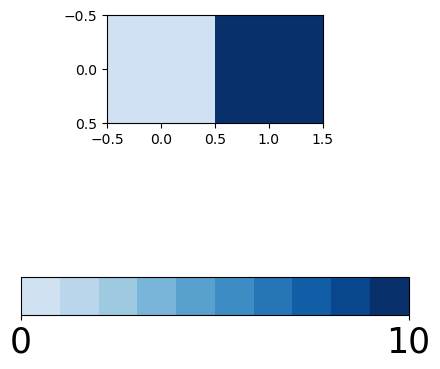

In [265]:
fig, ax = plt.subplots(figsize=(5, 4))  # 调整图形大小，确保颜色条清晰

# 创建自定义的颜色映射
cmap_red = ListedColormap(color_red)  # 为红色系创建颜色映射
cmap_blue = ListedColormap(color_blue)  # 为蓝色系创建颜色映射
# 绘制颜色条
# 绘制红色系的颜色条
# cbar_red = plt.colorbar(plt.imshow([[0, 1]], cmap=cmap_red), ax=ax, orientation='horizontal', aspect=10, pad=0.5)
# # cbar_red.set_label("Ld Time Moments")  # 设置标签
# cbar_red.set_ticks([0.0,1.0])  # 设置刻度
# cbar_red.set_ticklabels(['0','10'], fontsize=25)  # 自定义刻度标签位置

# # 绘制蓝色系的颜色条
cbar_blue = plt.colorbar(plt.imshow([[0, 1]], cmap=cmap_blue), ax=ax, orientation='horizontal', aspect=10, pad=0.5)
# cbar_blue.set_label("Lo Time Moments")  # 设置标签
# cbar_blue.set_ticks([0.2, 0.4, 0.6, 0.8])  # 设置刻度
# cbar_blue.set_ticklabels(["2", "4", "6", "8"])  # 自定义刻度标签位置
# cbar_blue.set_ticks([])  # 取消蓝色颜色条的刻度
cbar_blue.set_ticks([0.0,1.0])  # 设置刻度
cbar_blue.set_ticklabels(['0','10'], fontsize=25)  # 自定义刻度标签位置

plt.savefig(
    '/data/gulab/yzdai/data4/atomdensity/plot_data/out/'+sys+'-time2scd_distr_bar.png',        # 文件名
    dpi=350,             # 分辨率
    format='png',        # 文件格式
    bbox_inches='tight', # 自动调整边界框
    pad_inches=0.0,      # 边界填充
    # facecolor='white',   # 背景颜色
    # edgecolor='black',   # 边缘颜色
    transparent=True,   # 是否透明背景
    # metadata={'Author': 'Your Name'}  # 元数据
)